In [14]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for ‘Adelie’ and ‘Chinstrap’ classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)


       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [15]:
print(X.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg=LogisticRegression(solver='saga')
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(logreg.coef_,logreg.intercept_)

ValueError: could not convert string to float: 'Adelie'

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [19]:
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cat_cols = ['island','sex']
X = df_filtered[num_cols + cat_cols]

pre=ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

clf=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='saga'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(clf.named_steps['logreg'].coef_,clf.named_steps['logreg'].intercept_)

Accuracy: 0.58
[[ 2.75357943e-03 -8.03358049e-05  4.90409990e-04 -2.87934184e-04
  -8.81694225e-05  1.84491953e-04 -1.04655738e-04 -1.90382347e-05
   1.07050274e-05]] [-8.3332426e-06]


e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
clf=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='liblinear'))
])


clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(clf.named_steps['logreg'].coef_,clf.named_steps['logreg'].intercept_)

Accuracy: 1.00
[[ 1.47468853 -1.37430792 -0.14078737 -0.00345252 -0.22719322  0.70932875
  -0.55842987  0.12816578 -0.20446011]] [-0.07629434]


In [21]:
import numpy as np
random_state=np.arange(0,100)
accuracies=[]

clf=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='saga'))
])

for rs in random_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)

e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: Convergen

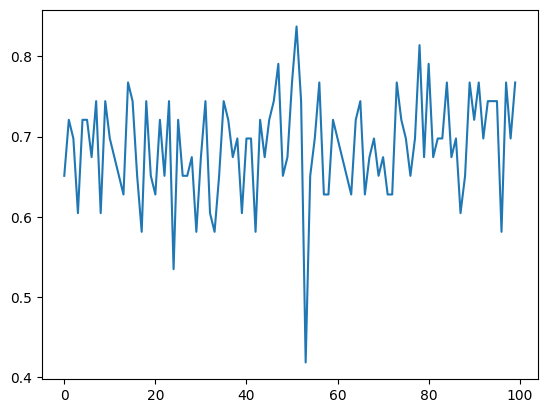

In [31]:
import matplotlib.pyplot as plt
plt.plot(random_state, accuracies)


In [23]:
def output_(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(clf.named_steps['logreg'].coef_,clf.named_steps['logreg'].intercept_)

In [24]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()

pre=ColumnTransformer([
    ('num', sta, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

clf_saga=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='saga'))
])

clf_lin=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='liblinear'))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
output_(clf_saga, X_train, X_test, y_train, y_test)
output_(clf_lin, X_train, X_test, y_train, y_test)


Accuracy: 1.00
[[ 3.40883331 -0.51190255  0.37520046 -0.41863405 -0.48978203  1.23715808
  -0.78557091  0.73673636 -0.77493123]] [-2.58532457]
Accuracy: 1.00
[[ 3.3644409  -0.46791442  0.34694072 -0.41617085 -0.76546108  0.64453562
  -1.11853078  0.10655085 -1.34600708]] [-1.23945623]


e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##  Logistic regression First/Second-Order Methods


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

transformation = [[0.5, 0.5], 
                  [-0.5, 1.5]]

X = np.dot(X, transformation)


In [45]:
print(X[:5])
print(y[:5])

[[-2.19655439 -6.04817613]
 [ 0.81789766  4.8792503 ]
 [ 2.8314302   5.80299161]
 [-2.17405112 -6.11864355]
 [ 1.39572564  5.76178384]]
[0 1 1 0 1]


In [46]:
X1=np.hstack([X,np.ones((X.shape[0],1))])
W=np.zeros(X1.shape[1])

In [47]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def grad(p):
    return (X1.T @ (p - y)) / X1.shape[0]

In [48]:
iters=20
lr=0.1
loss_hist=[]
eps=1e-15

for i in range(iters):
    p = sigmoid(X1 @ W)
    W -= lr * grad(p)
    loss = -np.mean(y * np.log(p+eps) + (1 - y) * np.log(1 - p+eps))
    loss_hist.append(loss)
    print(f"Iteration {i+1}/{iters}, Loss: {loss:.4f}")

Iteration 1/20, Loss: 0.6931
Iteration 2/20, Loss: 0.3553
Iteration 3/20, Loss: 0.2447
Iteration 4/20, Loss: 0.1901
Iteration 5/20, Loss: 0.1570
Iteration 6/20, Loss: 0.1345
Iteration 7/20, Loss: 0.1182
Iteration 8/20, Loss: 0.1057
Iteration 9/20, Loss: 0.0958
Iteration 10/20, Loss: 0.0877
Iteration 11/20, Loss: 0.0810
Iteration 12/20, Loss: 0.0753
Iteration 13/20, Loss: 0.0704
Iteration 14/20, Loss: 0.0662
Iteration 15/20, Loss: 0.0625
Iteration 16/20, Loss: 0.0592
Iteration 17/20, Loss: 0.0563
Iteration 18/20, Loss: 0.0536
Iteration 19/20, Loss: 0.0513
Iteration 20/20, Loss: 0.0491


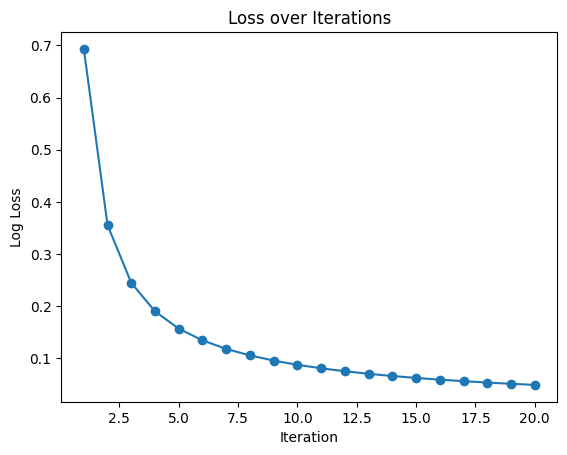

In [49]:

plt.plot(range(1, iters + 1), loss_hist, marker='o')
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.show()

In [50]:
def hess(p):
    diag = p * (1 - p)
    return (X1.T * diag) @ X1 / X1.shape[0]

In [51]:
lambda_damp=1e-8
l0ss_hist_newton=[]

for i in range(iters):
    p=sigmoid(X1 @ W)
    g=grad(p)
    h=hess(p)
    step=np.linalg.solve(h+lambda_damp*np.eye(h.shape[0]), g)
    W -= step
    loss = -np.mean(y * np.log(p+eps) + (1 - y) * np.log(1 - p+eps))
    l0ss_hist_newton.append(loss)
    print(f"Iteration {i+1}/{iters}, Loss: {loss:.4f}")



Iteration 1/20, Loss: 0.0471
Iteration 2/20, Loss: 0.0178
Iteration 3/20, Loss: 0.0070
Iteration 4/20, Loss: 0.0028
Iteration 5/20, Loss: 0.0012
Iteration 6/20, Loss: 0.0005
Iteration 7/20, Loss: 0.0002
Iteration 8/20, Loss: 0.0001
Iteration 9/20, Loss: 0.0000
Iteration 10/20, Loss: 0.0000
Iteration 11/20, Loss: 0.0000
Iteration 12/20, Loss: 0.0000
Iteration 13/20, Loss: 0.0000
Iteration 14/20, Loss: 0.0000
Iteration 15/20, Loss: 0.0000
Iteration 16/20, Loss: 0.0000
Iteration 17/20, Loss: 0.0000
Iteration 18/20, Loss: 0.0000
Iteration 19/20, Loss: 0.0000
Iteration 20/20, Loss: 0.0000


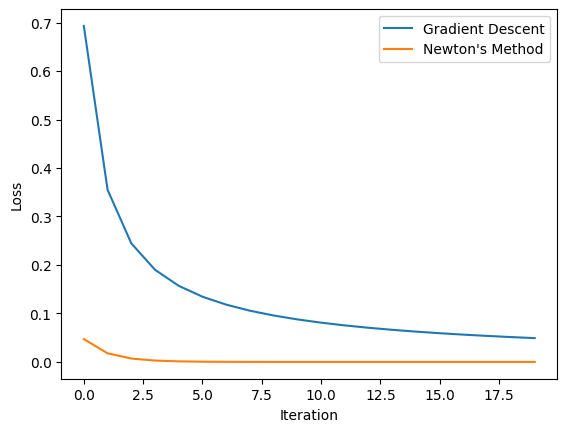

In [52]:

plt.plot(loss_hist, label='Gradient Descent')
plt.plot(l0ss_hist_newton, label='Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:

centers = [[2, 2], [5, 1.5]]

X, y2 = make_blobs(n_samples=2000, centers=centers, random_state=5)

transformation = [[0.5, 0.5], 
                  [-0.5, 1.5]]

X = np.dot(X, transformation)
X1=np.hstack([X,np.ones((X.shape[0],1))])
W_new=np.zeros(X1.shape[1])

iters=20
lr=0.1
loss_hist2=[]
eps=1e-15

for i in range(iters):
    p = sigmoid(X1 @ W_new)
    W_new -= lr * grad(p)
    loss = -np.mean(y2 * np.log(p+eps) + (1 - y2) * np.log(1 - p+eps))
    loss_hist2.append(loss)
    print(f"Iteration {i+1}/{iters}, Loss: {loss:.4f}")

Iteration 1/20, Loss: 0.6931
Iteration 2/20, Loss: 0.6728
Iteration 3/20, Loss: 0.6575
Iteration 4/20, Loss: 0.6438
Iteration 5/20, Loss: 0.6311
Iteration 6/20, Loss: 0.6192
Iteration 7/20, Loss: 0.6080
Iteration 8/20, Loss: 0.5974
Iteration 9/20, Loss: 0.5876
Iteration 10/20, Loss: 0.5782
Iteration 11/20, Loss: 0.5695
Iteration 12/20, Loss: 0.5612
Iteration 13/20, Loss: 0.5534
Iteration 14/20, Loss: 0.5460
Iteration 15/20, Loss: 0.5390
Iteration 16/20, Loss: 0.5324
Iteration 17/20, Loss: 0.5261
Iteration 18/20, Loss: 0.5202
Iteration 19/20, Loss: 0.5145
Iteration 20/20, Loss: 0.5091


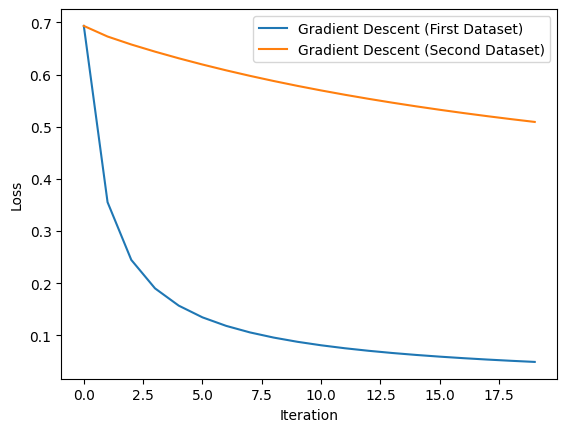

In [62]:
plt.plot(loss_hist, label='Gradient Descent (First Dataset)')
plt.plot(loss_hist2, label='Gradient Descent (Second Dataset)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()